In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def get_kernel(img, x, y, kernelSize):
    padding = kernelSize//2
    return img[x-padding:x+padding+1, y-padding:y+padding+1]


def average_kernel(kernel):
    return np.mean(kernel)


def median_kernel(kernel):
    return np.median(kernel)


def apply_kernel(img, kernelSize, kernelFunc):
    # Get the dimensions of the image
    rows, cols = img.shape
    # Create a blank image of the same size as the original
    img_avg = np.zeros((rows, cols), dtype=np.uint8)
    # Get the kernel size
    k = kernelSize
    # Loop through the image
    padding = k//2
    xStart, xEnd = 0 + padding, rows - padding
    yStart, yEnd = 0 + padding, cols - padding

    for i in range(xStart, xEnd):
        for j in range(yStart, yEnd):
            # Get the kernel
            kernel = get_kernel(img, i, j, kernelSize)
            # Get the average of the kernel
            avg = kernelFunc(kernel)
            # Set the pixel value to the average
            img_avg[i, j] = avg

    return img_avg


def average_filter(img, kernelSize=3):
    return apply_kernel(img, kernelSize, average_kernel)


def median_filter(img, kernelSize=3):
    return apply_kernel(img, kernelSize, median_kernel)

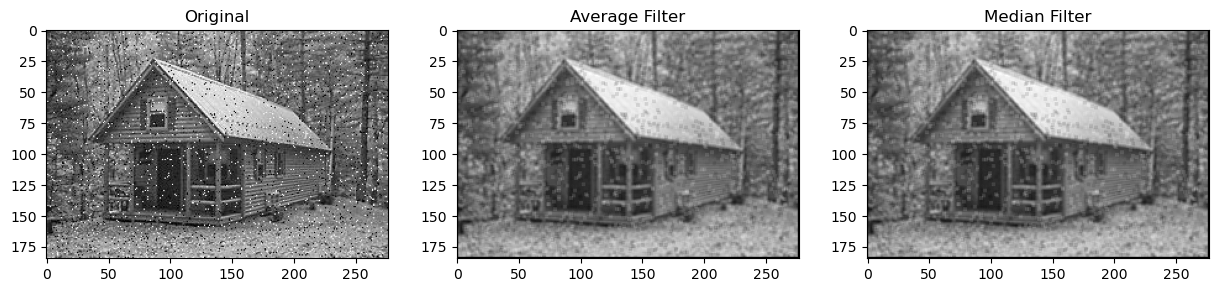

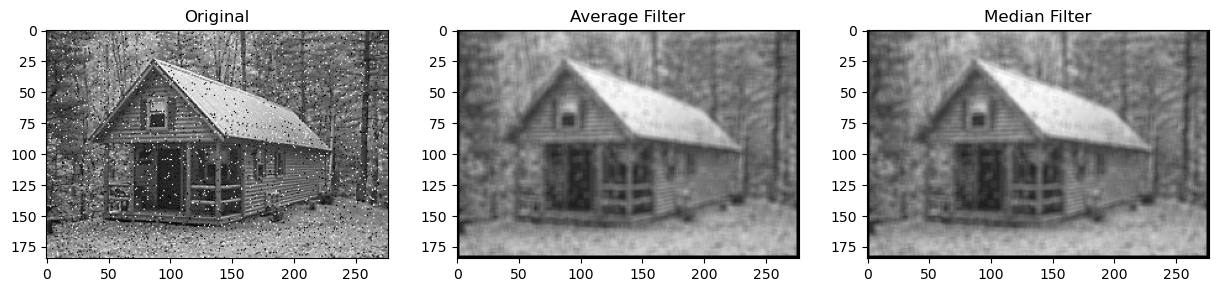

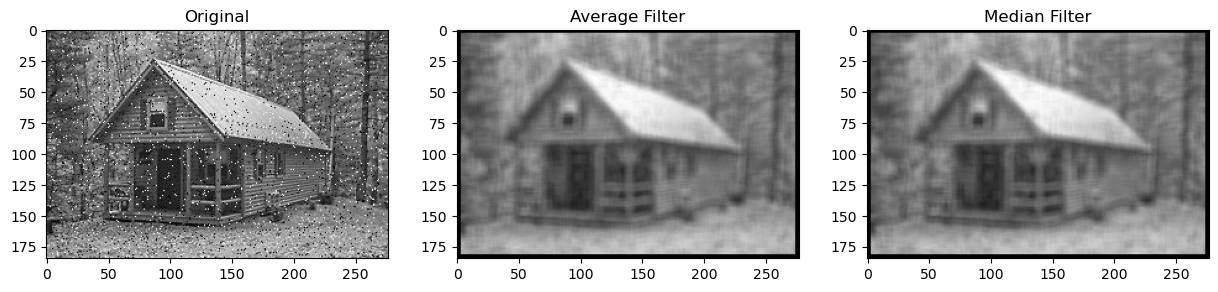

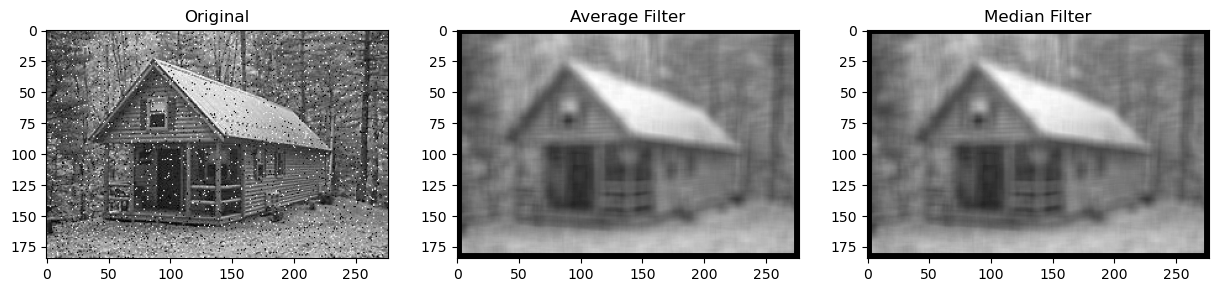

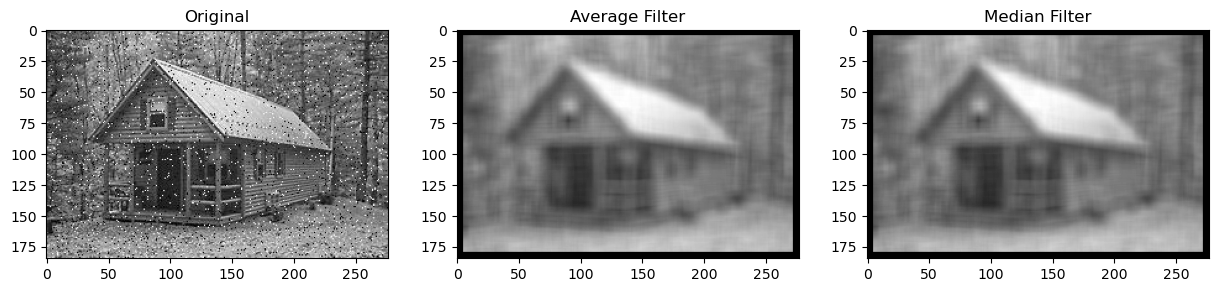

In [12]:
noisy_img1 = cv2.imread("img/noisy_img1.jpg")

# Convert to grayscale
noisy_img1 = cv2.cvtColor(noisy_img1, cv2.COLOR_BGR2GRAY)

# Kernel size
kernelSizes = [3, 5, 7, 9, 11]

for kernelSize in kernelSizes:
    # Average filter
    img_avg = average_filter(noisy_img1, kernelSize)
    # Median filter
    img_med = median_filter(noisy_img1, kernelSize)

    # Plot the images
    plt.figure(figsize=(15, 15))

    plt.subplot(131)
    plt.imshow(noisy_img1, cmap="gray")
    plt.title("Original")

    plt.subplot(132)
    plt.imshow(img_avg, cmap="gray")
    plt.title("Average Filter")

    plt.subplot(133)
    plt.imshow(img_avg, cmap="gray")
    plt.title("Median Filter")

    cv2.imwrite(f"output/noisy_img1_avg_{kernelSize}.jpg", img_avg)
    cv2.imwrite(f"output/noisy_img1_med_{kernelSize}.jpg", img_med)

    plt.show()

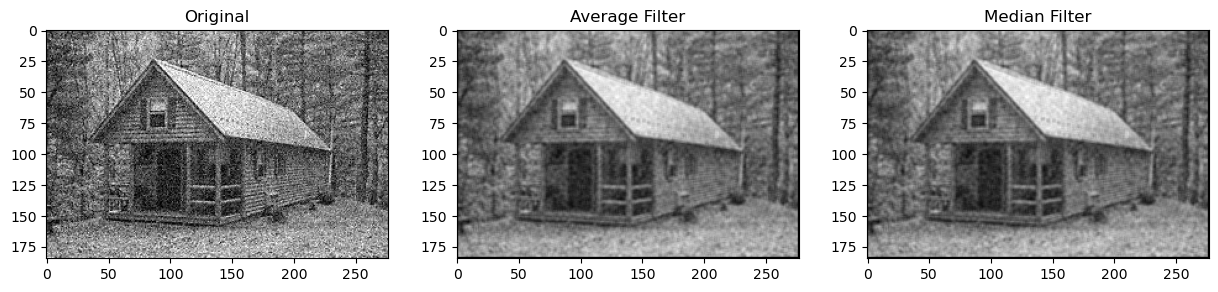

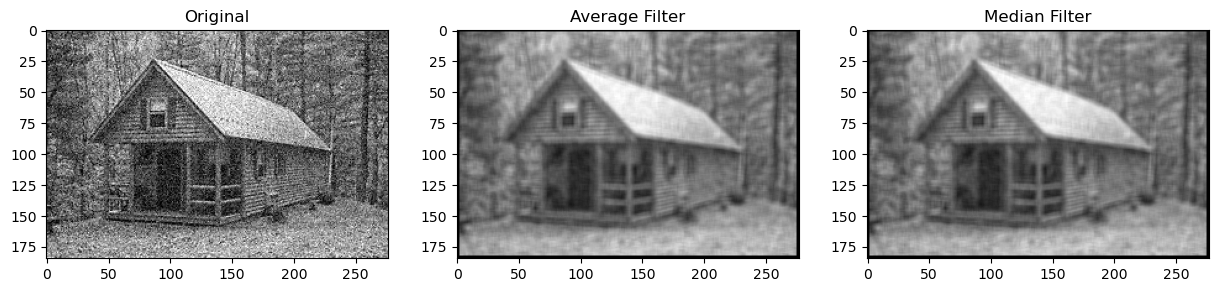

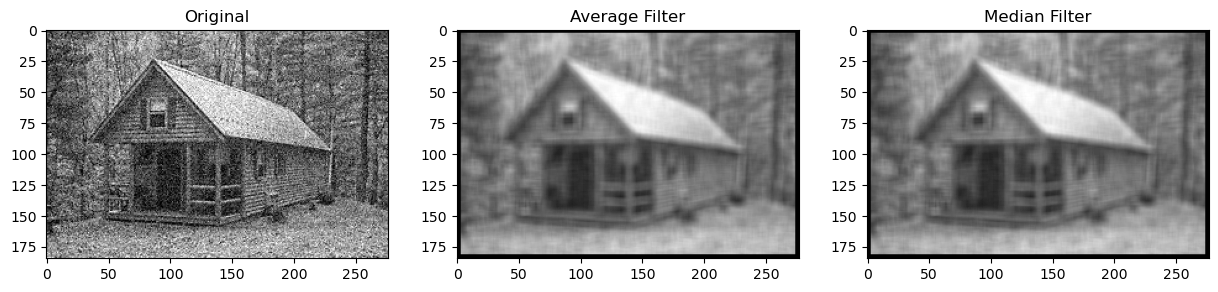

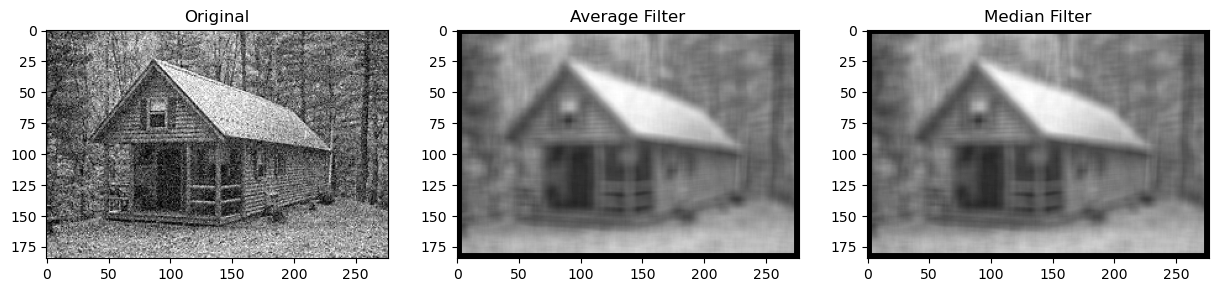

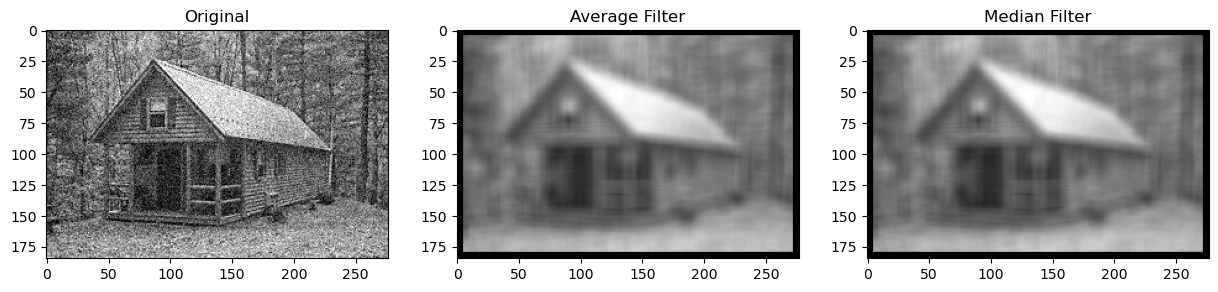

In [13]:
# Read the image
noisy_img2 = cv2.imread("img/noisy_img2.jpg")

# Convert the image to grayscale
noisy_img2 = cv2.cvtColor(noisy_img2, cv2.COLOR_BGR2GRAY)

# For each kernel size
for kernelSize in kernelSizes:
    # Apply the average filter
    img_avg = average_filter(noisy_img2, kernelSize)

    # Apply the median filter
    img_med = median_filter(noisy_img2, kernelSize)

    # Plot the images
    plt.figure(figsize=(15, 15))

    plt.subplot(131)
    plt.imshow(noisy_img2, cmap="gray")
    plt.title("Original")

    plt.subplot(132)
    plt.imshow(img_avg, cmap="gray")
    plt.title("Average Filter")

    plt.subplot(133)
    plt.imshow(img_avg, cmap="gray")
    plt.title("Median Filter")

    cv2.imwrite(f"output/noisy_img2_avg_{kernelSize}.jpg", img_avg)
    cv2.imwrite(f"output/noisy_img2_med_{kernelSize}.jpg", img_med)

    plt.show()

In [14]:
def kernelize(img, kernel):
    """
    Apply the kernel to the image
    """
    return cv2.filter2D(img, -1, kernel)


def sharpen(img, kernel):
    """
    Sharpen the image by adding the kernelized image to the original one
    """
    return img + kernel


def display_images(images, rows=1, cols=1):
    """
    Display multiple images with their titles
    images: list of dictionaries containing the image title and position (row, col)
    """
    fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
    # axis off for all subplots
    for ax in axes.ravel():
        ax.axis("off")

    if len(axes.shape) == 1:
        axes = np.expand_dims(axes, axis=0)

    for i, image in enumerate(images):
        img, title, position = image["img"], image["title"], image["position"]
        row, col = position

        axes[row, col].imshow(img, cmap="gray")
        axes[row, col].set_title(title)
        axes[row, col].axis("off")

    plt.show()

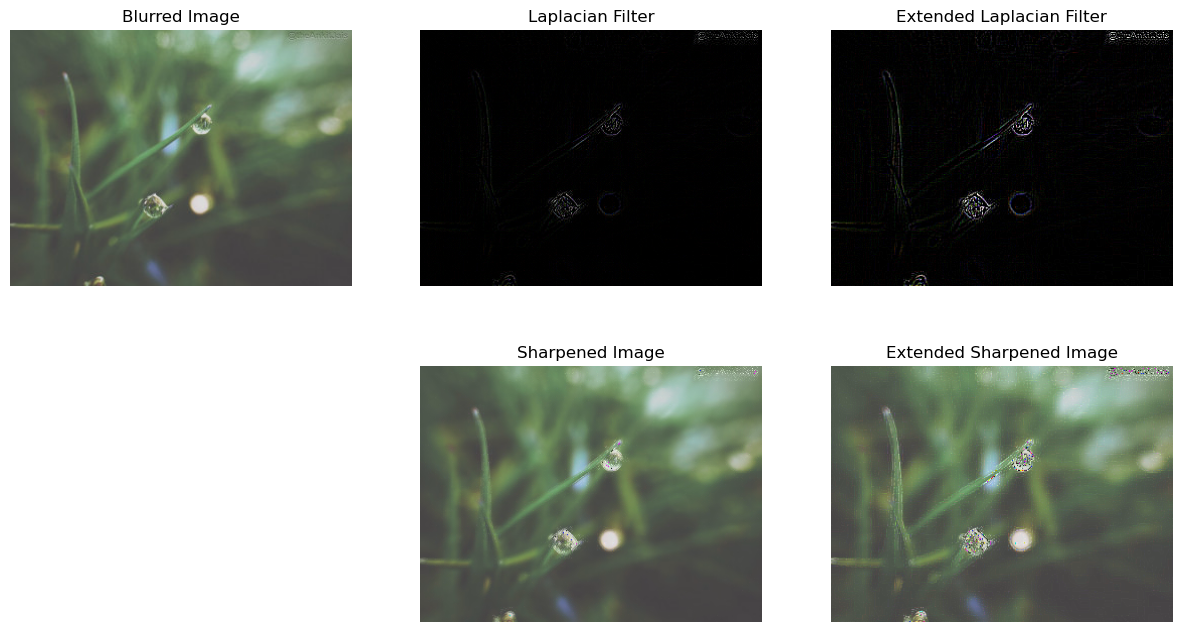

True

In [15]:
blurred_img = cv2.imread("img/blurred_image.jpg")

# Kernel
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
extended_laplacian_kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])

# For each R G B channel
laplacian_img = np.zeros_like(blurred_img)
extended_laplacian_img = np.zeros_like(blurred_img)

shapened_img = np.zeros_like(blurred_img)
extended_shapened_img = np.zeros_like(blurred_img)

for i in range(3):
    laplacian_img[:, :, i] = kernelize(blurred_img[:, :, i], laplacian_kernel)
    extended_laplacian_img[:, :, i] = kernelize(blurred_img[:, :, i], extended_laplacian_kernel)

    shapened_img[:, :, i] = sharpen(blurred_img[:, :, i], laplacian_img[:, :, i])
    extended_shapened_img[:, :, i] = sharpen(blurred_img[:, :, i], extended_laplacian_img[:, :, i])


images = [
    {"img": blurred_img, "title": "Blurred Image", "position": (0, 0)},
    {"img": laplacian_img, "title": "Laplacian Filter", "position": (0, 1)},
    {"img": extended_laplacian_img, "title": "Extended Laplacian Filter", "position": (0, 2)},
    {"img": shapened_img, "title": "Sharpened Image", "position": (1, 1)},
    {"img": extended_shapened_img, "title": "Extended Sharpened Image", "position": (1, 2)},
]

display_images(images, rows=2, cols=3)

cv2.imwrite("output//blurred_img_laplacian.jpg", laplacian_img)
cv2.imwrite("output//blurred_img_extended_laplacian.jpg", extended_laplacian_img)
cv2.imwrite("output//blurred_img_sharpened.jpg", shapened_img)
cv2.imwrite("output//blurred_img_extended_sharpened.jpg", extended_shapened_img)

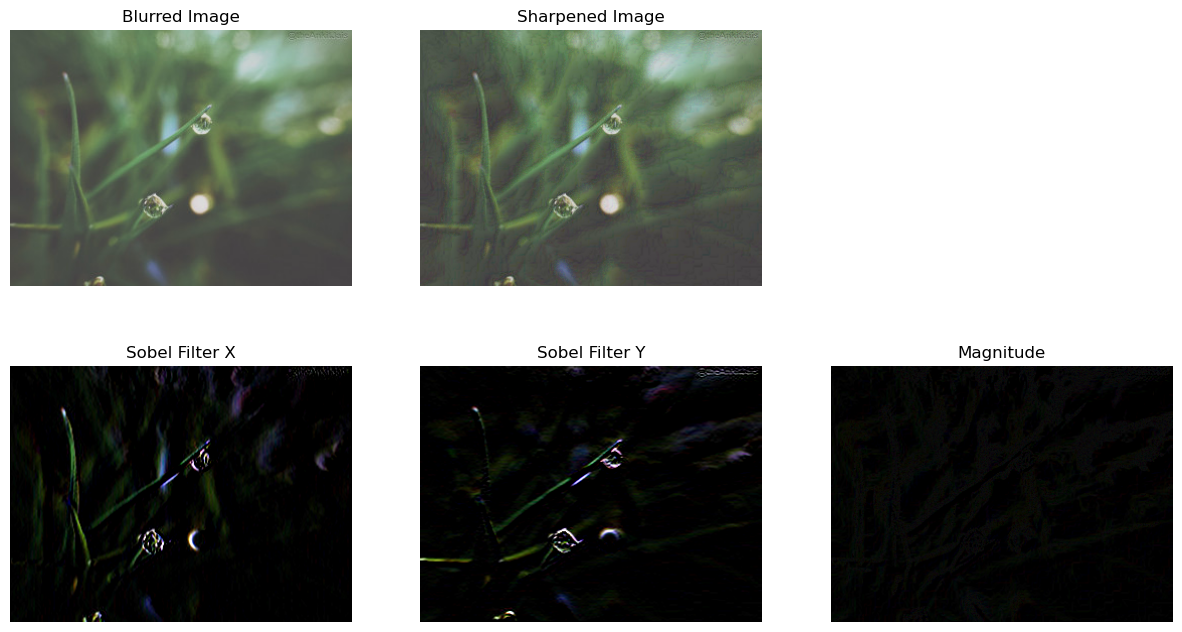

True

In [16]:
# Sobel
sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# For each R G B channel
sobel_img_x = np.zeros_like(blurred_img)
sobel_img_y = np.zeros_like(blurred_img)

magnitude = np.zeros_like(blurred_img)

shapened_img_sobel = np.zeros_like(blurred_img)

for i in range(3):
    # Apply the kernel
    sobel_img_x[:, :, i] = cv2.filter2D(blurred_img[:, :, i], -1, sobel_kernel_x)
    sobel_img_y[:, :, i] = cv2.filter2D(blurred_img[:, :, i], -1, sobel_kernel_y)

    # Add the result to the original image
    magnitude[:, :, i] = np.sqrt(sobel_img_x[:, :, i]**2 + sobel_img_y[:, :, i]**2)

    # Add the result to the original image
    shapened_img_sobel[:, :, i] = blurred_img[:, :, i] - magnitude[:, :, i]

images = [
    {"img": blurred_img, "title": "Blurred Image", "position": (0, 0)},
    {"img": sobel_img_x, "title": "Sobel Filter X", "position": (1, 0)},
    {"img": sobel_img_y, "title": "Sobel Filter Y", "position": (1, 1)},
    {"img": magnitude, "title": "Magnitude", "position": (1, 2)},
    {"img": shapened_img_sobel, "title": "Sharpened Image", "position": (0, 1)},
]

display_images(images, rows=2, cols=3)
cv2.imwrite("output//blurred_img_sobel_x.jpg", sobel_img_x)
cv2.imwrite("output//blurred_img_sobel_y.jpg", sobel_img_y)
cv2.imwrite("output//blurred_img_magnitude.jpg", magnitude)
cv2.imwrite("output//blurred_img_sharpened_sobel.jpg", shapened_img_sobel)